In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\uk222\OneDrive - University of Exeter\Data Science and Machine Learning Python\dataset\all_plasma_effectiveness_data_pC.csv"
plasma = pd.read_csv(file_path)

print(plasma.head())

# I am using the Faraday charge measurements for this analysis, as they serve as the main metric for the below experiments. 
# The calibrated charge measurements from the RCS are complementary to these methods but are lightly less accurate.

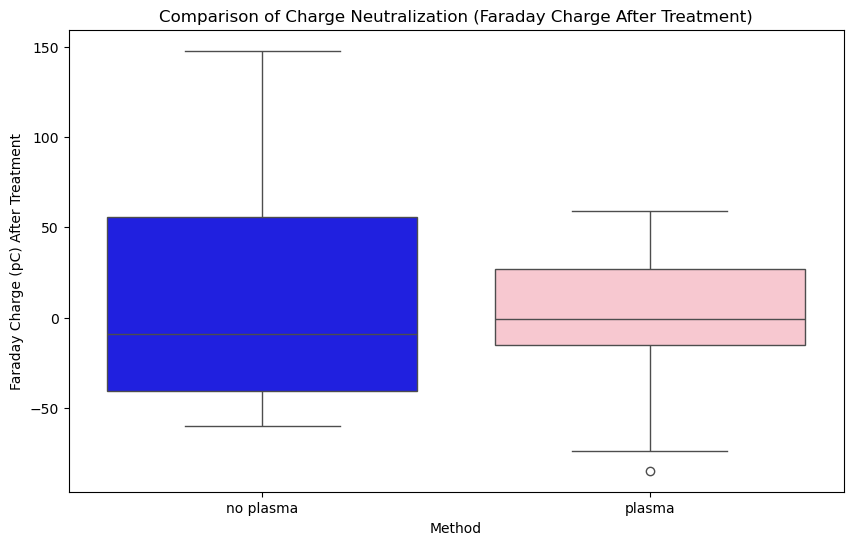

Shapiro-Wilk Test for Normality:
Plasma Method p-value: 0.14741407015448066
No Plasma Method p-value: 0.0014428824219387575
T-Test Results:
t-statistic: -0.8110962220785901
p-value: 0.42135416497345046
Summary statistics by group:
      method          material    size   n  mean_faraday_before  \
0  no plasma         bumblebee     big  10               140.10   
1  no plasma         bumblebee  small   10               184.00   
2  no plasma        nylon ball     big   5               265.40   
3  no plasma        nylon ball  small    5               123.40   
4     plasma         bumblebee     big   5                39.80   
5     plasma         bumblebee   small   4               118.25   
6     plasma        nylon ball     big   5               309.80   
7     plasma        nylon ball   small   4               126.00   
8     plasma  waxed nylon ball     big   5               154.60   

   mean_faraday_after  sd_faraday_before  sd_faraday_after  
0              -28.30             129

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro

# Q1: How close to zero are the charges after treatment?
# Purpose: Focus on the effectiveness of achieving charge neutrality directly.
# Logic: Closer to zero charges after treatment may indicate better neutralization, irrespective of the initial charge

# Assumptions: Data independent=> test for normality
# Filter data by method
plasma_data = plasma[plasma['method'] == 'plasma']
no_plasma_data = plasma[plasma['method'] == 'no plasma']

# Shapiro-Wilk test for normality
shapiro_plasma = shapiro(plasma_data['faraday_charge_pC_after'])
shapiro_no_plasma = shapiro(no_plasma_data['faraday_charge_pC_after'])

# T-test to compare the two methods
t_stat, p_value = ttest_ind(plasma_data['faraday_charge_pC_after'],
                           no_plasma_data['faraday_charge_pC_after'],
                           equal_var=False)  # Welch's t-test for unequal variances

color_dict = {'plasma': 'pink', 'no plasma': 'blue'}
plt.figure(figsize=(10, 6))
sns.boxplot(x='method', 
            y='faraday_charge_pC_after', 
            data=plasma, 
            hue='method', 
            palette=color_dict)
plt.title('Comparison of Charge Neutralization (Faraday Charge After Treatment)')
plt.xlabel('Method')
plt.ylabel('Faraday Charge (pC) After Treatment')
plt.show()


print("Shapiro-Wilk Test for Normality:")
print("Plasma Method p-value:", shapiro_plasma.pvalue)
print("No Plasma Method p-value:", shapiro_no_plasma.pvalue)

print("\
T-Test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Summary table of means and SDs grouped by method, material, and size
summary_stats = plasma.groupby(['method', 'material', 'size']).agg(
    n=('faraday_charge_pC_before', 'count'),
    mean_faraday_before=('faraday_charge_pC_before', 'mean'),
    mean_faraday_after=('faraday_charge_pC_after', 'mean'),
    sd_faraday_before=('faraday_charge_pC_before', 'std'),
    sd_faraday_after=('faraday_charge_pC_after', 'std')
).reset_index().round(2)

print("Summary statistics by group:")
print(summary_stats)

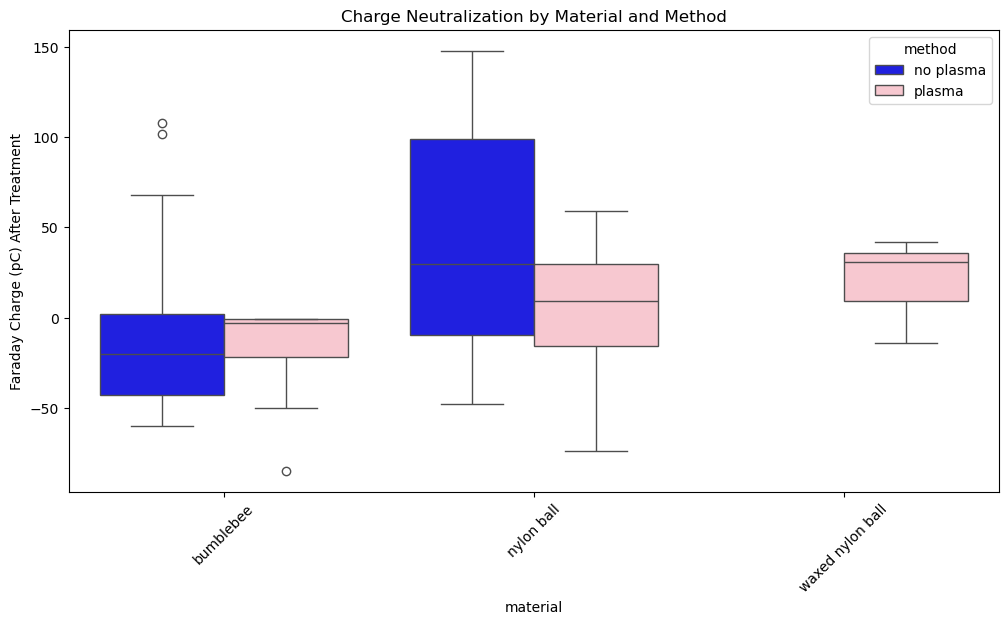

Charge Reduction by Material and Method:
                              mean     std
material         method                   
bumblebee        no plasma  169.80  104.85
                 plasma      94.00   47.67
nylon ball       no plasma  150.20   63.29
                 plasma     223.44  127.88
waxed nylon ball plasma     133.80   25.48


In [9]:
import seaborn as sns

# Effectiveness by material
# Note: waxed nylon ball was not tested in the no plasma method
color_dict = {'plasma': 'pink', 'no plasma': 'blue'}
plt.figure(figsize=(12, 6))
sns.boxplot(data=plasma,
            x='material', 
            y='faraday_charge_pC_after', 
            hue='method', 
            palette=color_dict)
plt.title('Charge Neutralization by Material and Method')
plt.xticks(rotation=45)
plt.ylabel('Faraday Charge (pC) After Treatment')
plt.show()

# Mean charge reduction by material
plasma['charge_reduction'] = plasma['faraday_charge_pC_before'] - plasma['faraday_charge_pC_after']
material_effectiveness = plasma.groupby(['material', 'method'])['charge_reduction'].agg(['mean', 'std']).round(2)
print("\
Charge Reduction by Material and Method:")
print(material_effectiveness)

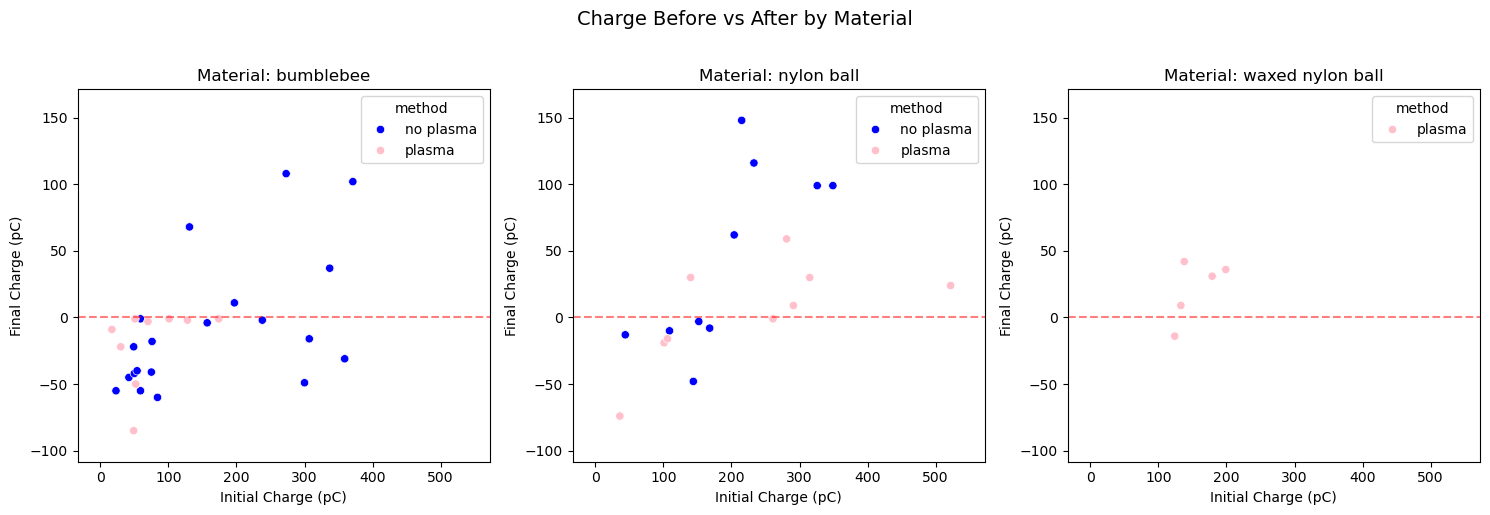

Y-axis limits: -108.30 to 171.30
X-axis limits: -33.50 to 572.50


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

color_dict = {'plasma': 'pink', 'no plasma': 'blue'}

fig = plt.figure(figsize=(15, 5))

y_min = plasma['faraday_charge_pC_after'].min()
y_max = plasma['faraday_charge_pC_after'].max()
x_min = plasma['faraday_charge_pC_before'].min()
x_max = plasma['faraday_charge_pC_before'].max()

y_padding = (y_max - y_min) * 0.1
x_padding = (x_max - x_min) * 0.1

# Subplot for each material
for idx, material in enumerate(['bumblebee', 'nylon ball', 'waxed nylon ball'], 1):
    plt.subplot(1, 3, idx)
    
    material_data = plasma[plasma['material'] == material]
    
    sns.scatterplot(data=material_data,
                   x='faraday_charge_pC_before',
                   y='faraday_charge_pC_after',
                   hue='method',
                   palette=color_dict)
    
    # horizontal line at y=0 for better visuals
    plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
    
    plt.ylim(y_min - y_padding, y_max + y_padding)
    plt.xlim(x_min - x_padding, x_max + x_padding)
    
    plt.title(f'Material: {material}')
    plt.xlabel('Initial Charge (pC)')
    plt.ylabel('Final Charge (pC)')

plt.suptitle('Charge Before vs After by Material', y=1.02, size=14)
plt.tight_layout()
plt.show()

print(f"Y-axis limits: {y_min - y_padding:.2f} to {y_max + y_padding:.2f}")
print(f"X-axis limits: {x_min - x_padding:.2f} to {x_max + x_padding:.2f}")

Summary of size effect on charge changes:
     size     method  mean_faraday_change  sd_faraday_change   n
0     big  no plasma                16.07              73.16  15
1     big     plasma                 5.93              37.80  15
2   small     plasma               -14.62              25.07   8
3  small   no plasma                 3.07              47.70  15


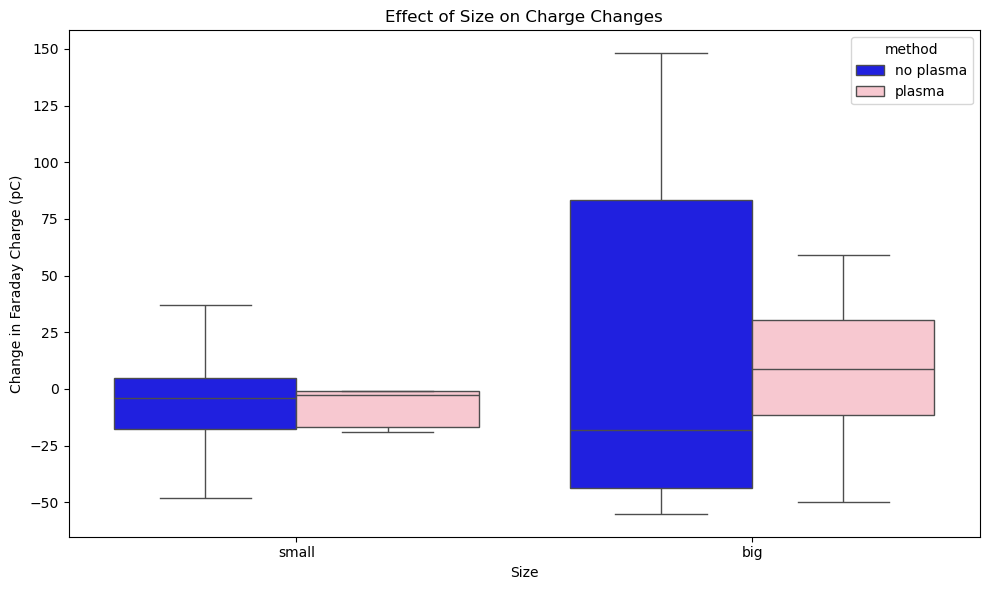

In [10]:
# Calculate size effect summary statistics
size_effect_summary = plasma.groupby(['size', 'method']).agg(
    mean_faraday_change=('faraday_charge_pC_after', 'mean'),
    sd_faraday_change=('faraday_charge_pC_after', 'std'),
    n=('faraday_charge_pC_after', 'count')
).reset_index().round(2)

plasma['size'] = plasma['size'].str.strip().str.lower()

print("Summary of size effect on charge changes:")
print(size_effect_summary)

# Create boxplot showing size effect
plt.figure(figsize=(10, 6))
sns.boxplot(data=plasma, 
            x='size', 
            y='faraday_charge_pC_after', 
            hue='method',
            palette={'plasma': 'pink', 'no plasma': 'blue'},
            showfliers=False)

plt.title('Effect of Size on Charge Changes')
plt.xlabel('Size')
plt.ylabel('Change in Faraday Charge (pC)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

['small' 'big']


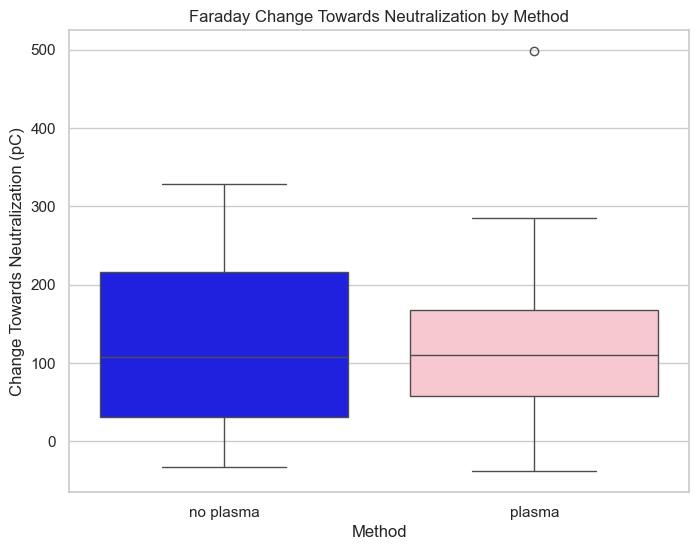

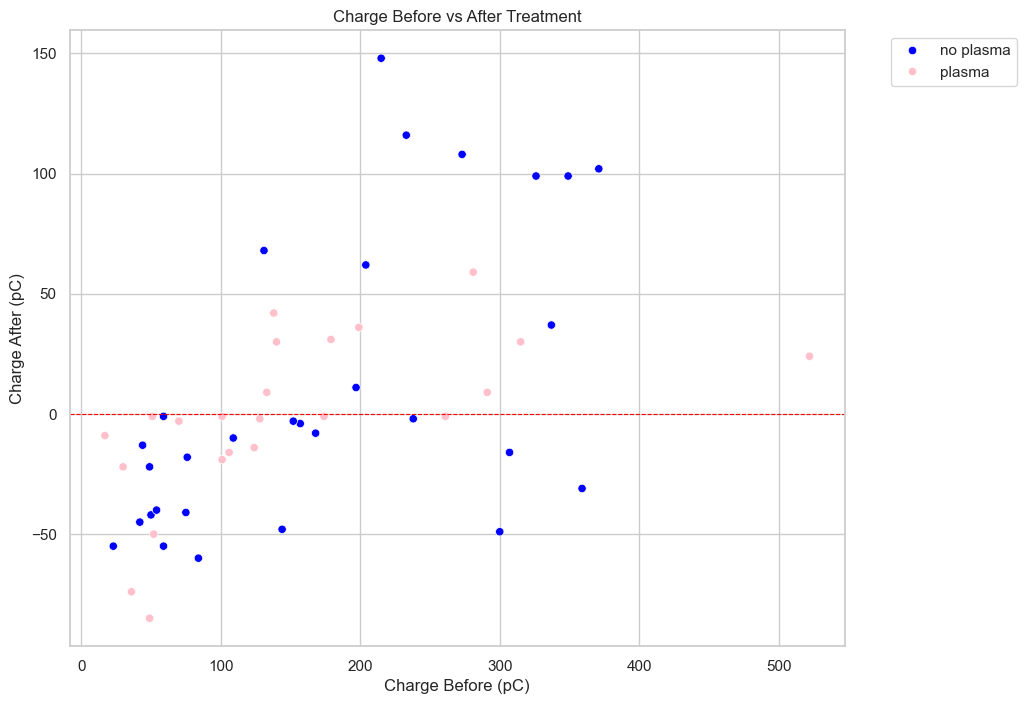

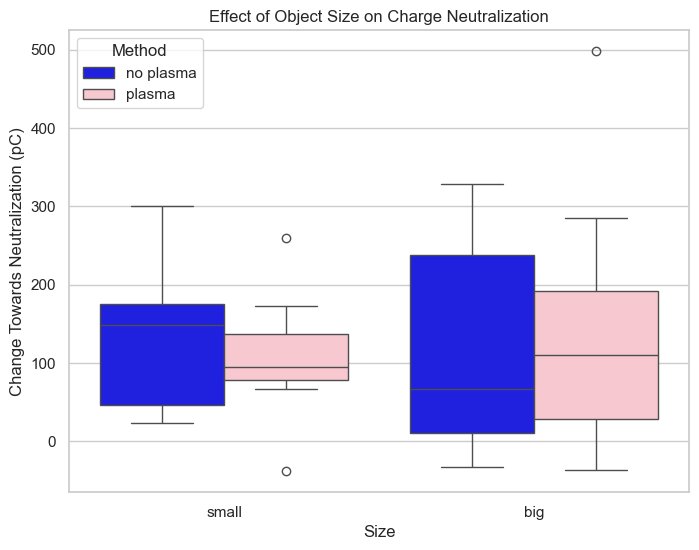

T-test for Faraday Change Towards Neutralization: TtestResult(statistic=0.05302896124136778, pvalue=0.9579160078520597, df=51.0)
T-test for Calibrated Change Towards Neutralization: TtestResult(statistic=0.7233222194334129, pvalue=0.4727865049159452, df=51.0)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

file_path = r"C:\Users\uk222\OneDrive - University of Exeter\Data Science and Machine Learning Python\dataset\all_plasma_effectiveness_data_pC.csv"
plasma2 = pd.read_csv(file_path)

# How much change occurred due to the treatment?
# Purpose: Measure the magnitude of the change in charge, whether positive or negative.
# Logic: Evaluate how much the plasma treatment adjusts the charge compared to no plasma, without focusing exclusively on neutrality.

# Had to do this, because for some reason python reads 3 sizes: small, big and then small again
plasma2['size'] = plasma2['size'].str.strip().str.lower()
print(plasma2['size'].unique())

# Calculate metrics for neutralization effectiveness
plasma2['faraday_neutralization'] = abs(plasma2['faraday_charge_pC_after'])
plasma2['calibrated_neutralization'] = abs(plasma2['calibratedcharge_after'])
plasma2['faraday_change_towards_zero'] = abs(plasma2['faraday_charge_pC_before']) - abs(plasma2['faraday_charge_pC_after'])
plasma2['calibrated_change_towards_zero'] = abs(plasma2['calibratedcharge_before']) - abs(plasma2['calibratedcharge_after'])

# Plasma vs. No Plasma comparison
plasma_data = plasma2[plasma2['method'] == 'plasma']
no_plasma_data = plasma2[plasma2['method'] == 'no plasma']

# T-tests to compare methods
faraday_ttest = ttest_ind(plasma_data['faraday_change_towards_zero'], no_plasma_data['faraday_change_towards_zero'])
calibrated_ttest = ttest_ind(plasma_data['calibrated_change_towards_zero'], no_plasma_data['calibrated_change_towards_zero'])

# Some visualizations
sns.set(style="whitegrid")

# Boxplot for plasma vs. no plasma (Change Towards Zero)
plt.figure(figsize=(8, 6))
sns.boxplot(data=plasma2, 
            x='method', 
            y='faraday_change_towards_zero', 
            hue='method',
            palette=color_dict)
plt.title('Faraday Change Towards Neutralization by Method')
plt.ylabel('Change Towards Neutralization (pC)')
plt.xlabel('Method')
plt.savefig('boxplot_neutralization.png')
plt.show()

# Scatterplots for charge before and after
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=plasma2,
    x='faraday_charge_pC_before', 
    y='faraday_charge_pC_after', 
    hue='method',
    palette=color_dict)

plt.title('Charge Before vs After Treatment')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.xlabel('Charge Before (pC)')
plt.ylabel('Charge After (pC)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('scatterplot_charge_before_after.png')
plt.show()

# Effect of size on charge changes
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=plasma2, 
    x='size', 
    y='faraday_change_towards_zero', 
    hue='method',
    palette=color_dict)
    
plt.title('Effect of Object Size on Charge Neutralization')
plt.ylabel('Change Towards Neutralization (pC)')
plt.xlabel('Size')
plt.legend(title='Method')
plt.savefig('size_effect_boxplot.png')
plt.show()

# Summary of t-test results
print("T-test for Faraday Change Towards Neutralization:", faraday_ttest)
print("T-test for Calibrated Change Towards Neutralization:", calibrated_ttest)